This document is a Exploratory Data Analysis for tomato leaf diseases. Here you will find analysis instructions, such as: data inspection, general data check (lines, columns and non-null values), descriptive analisys and histograms.

First of all, the imports and labeling read:

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\alefj\OneDrive\Documentos\MEIA_ISEP_TEAM7_2024_2025_Challenge_3\datasets\tomato_leaf_diseases\train\_annotations.csv')

Now, lets look through data inspection, data informations, descriptive analisys and non-null values:

In [6]:
# Inspecionando os dados
print('-------------------Inspeção de Dados--------------------\n')
print('-------------------Primeiros arquivos-------------------')
print(df.head())
print('-------------------Ultimos arquivos-------------------')
print(df.tail())

# Verificação de dados gerais (linhas, colunas, tipos de dados e valores nulos)
print('-------------------Verificação de Dados-------------------')
print(df.info())

# Análise descritiva
print('-------------------Análise Descritiva-------------------')
print(df.describe())

# Verificação de valores nulos
print('-------------------Valores Nulos-------------------')
print(df.isnull().sum())

-------------------Inspeção de Dados--------------------

-------------------Primeiros arquivos-------------------
                                            filename  width  height  \
0  collage_1245_jpg.rf.3515b3206dbd2de1491cb11ab3...    448     448   
1  collage_1245_jpg.rf.3515b3206dbd2de1491cb11ab3...    448     448   
2  collage_1245_jpg.rf.3515b3206dbd2de1491cb11ab3...    448     448   
3  collage_1245_jpg.rf.3515b3206dbd2de1491cb11ab3...    448     448   
4  iPhone_690c0_IMG_8683_PNG_jpg.rf.343f257058b74...    448     448   

          class  xmin  ymin  xmax  ymax  
0  Mosaic Virus    42    36   180   206  
1     Leaf Mold   273    31   433   187  
2  Early Blight    18   228   197   440  
3  Spider Mites   268   248   410   414  
4    Leaf Miner    97    68   343   448  
-------------------Ultimos arquivos-------------------
                                                filename  width  height  \
11618  collage_1798_jpg.rf.b32191bac6e767cdaf1455dcf7...    448     448   
1

Now, let's plot some graphs to understand what is going through the dataset. We will look at Diseases Frequency, Correlation's heatmap, Diseases Distribution and to observe the relationship between the diseases we'll need a pairplot graph.

Disease Frequency Graph

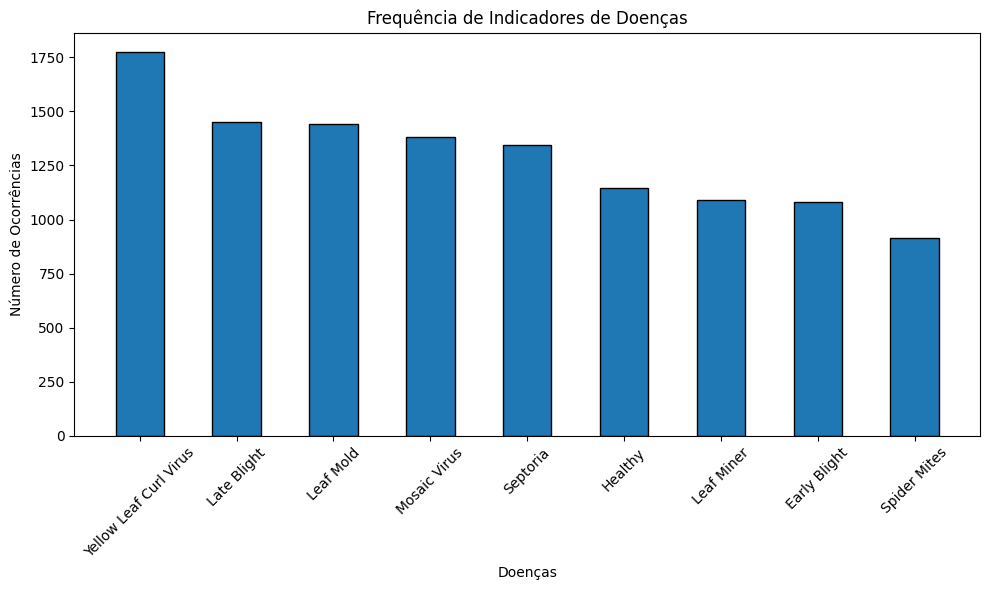

In [14]:
disease_counts = df['class'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(disease_counts.index, disease_counts.values, width=0.5, edgecolor='black')
plt.title('Frequência de Indicadores de Doenças')
plt.xlabel('Doenças')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bounding Box Histogram


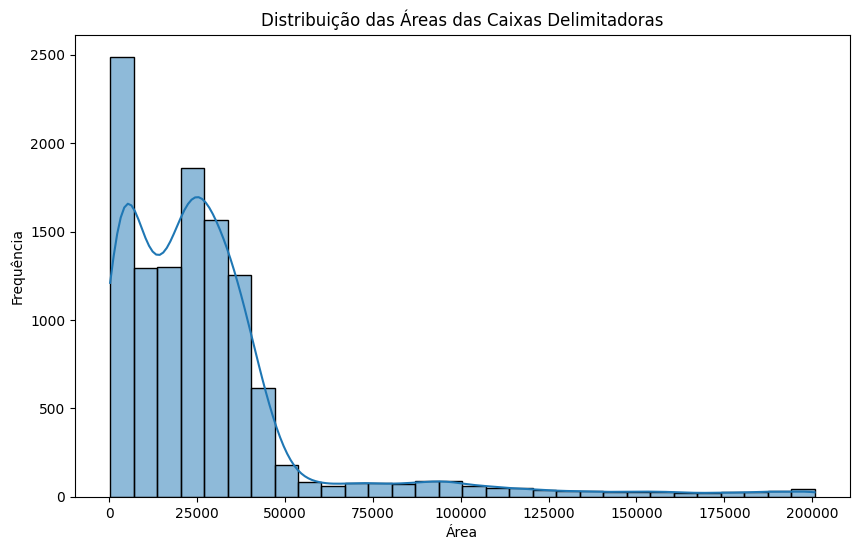

In [15]:
# Calcular a área das caixas delimitadoras
df['area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])

# Histograma das áreas
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribuição das Áreas das Caixas Delimitadoras')
plt.xlabel('Área')
plt.ylabel('Frequência')
plt.show()

Correlation Matrix and Heatmap


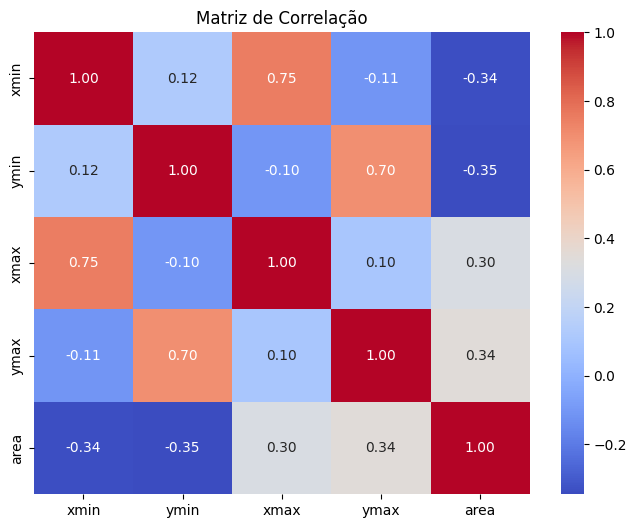

In [16]:
# Matriz de correlação
corr_matrix = df[['xmin', 'ymin', 'xmax', 'ymax', 'area']].corr()

# Mapa de calor da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Outliers identification by boxplot

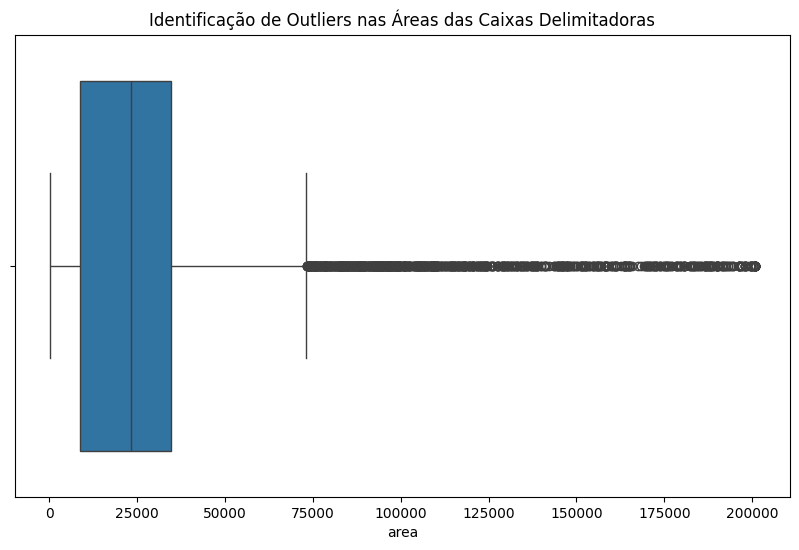

In [17]:
# Boxplot para identificar outliers nas áreas das caixas
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['area'])
plt.title('Identificação de Outliers nas Áreas das Caixas Delimitadoras')
plt.show()